# Analiza korelacji obrazu przy użyciu SVD

Cel ćwiczenia: Neleży wykonać analizę korelacji obrazu (plik `3.webp`) zgodnie z wariantem zadania:
- obliczyć rozkład SVD macierzy obrazu,
- zbudować macierze korelacji: X^T X (korelacje kolumn) oraz X X^T (korelacje wierszy),
- zwizualizować te macierze jako mapy cieplne (heatmapy),
- dla porównania pokazać znormalizowaną macierz korelacji (współczynniki korelacji) używając np.: `np.corrcoef`.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams['figure.figsize'] = [12,6]

img_path = '3.webp'

Oryginalny rozmiar obrazu (H,W,C): (628, 800, 3) dtype: uint8
Obraz po konwersji do skali szarości (H,W): (628, 800)


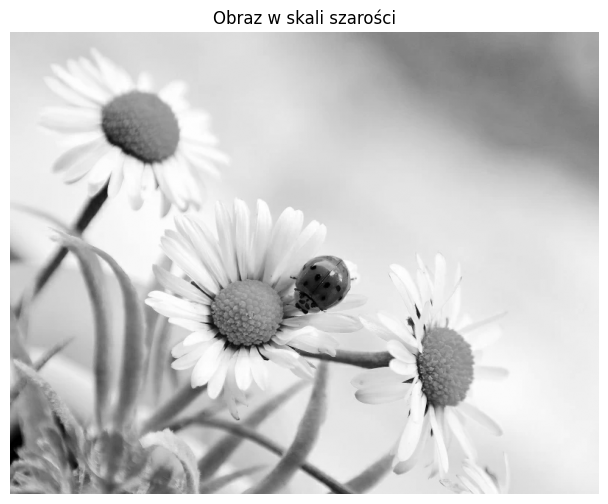

In [6]:
# Wczytanie obrazu i konwersja do skali szarości
img = Image.open(img_path)
A = np.array(img)
print('Oryginalny rozmiar obrazu (H,W,C):', A.shape, 'dtype:', A.dtype)
if A.ndim == 3 and A.shape[2] >= 3:
    X = np.mean(A[..., :3], axis=-1)
else:
    X = A.astype(float)
X = X.astype(float)
print('Obraz po konwersji do skali szarości (H,W):', X.shape)

plt.figure()
plt.imshow(X, cmap='gray')
plt.title('Obraz w skali szarości')
plt.axis('off')
plt.show()


In [7]:
# Obliczenie SVD (dla informacji) i wyznaczenie macierzy korelacji
U, s, VT = np.linalg.svd(X, full_matrices=False)
print('Liczba singularnych wartości:', s.size)

# Macierze korelacji (surowe) – zgodnie z definicjami w treści zadania
# XTX -> korelacja kolumn (m x m), XXT -> korelacja wierszy (n x n)
XTX = X.T @ X
XXT = X @ X.T

print('Kształty: XTX=', XTX.shape, ' XXT=', XXT.shape)

# Dla porównania: znormalizowane macierze korelacji (współczynniki korelacji)
cols_corr = np.corrcoef(X.T)  # m x m, korelacje kolumn
rows_corr = np.corrcoef(X)   # n x n, korelacje wierszy


Liczba singularnych wartości: 628
Kształty: XTX= (800, 800)  XXT= (628, 628)


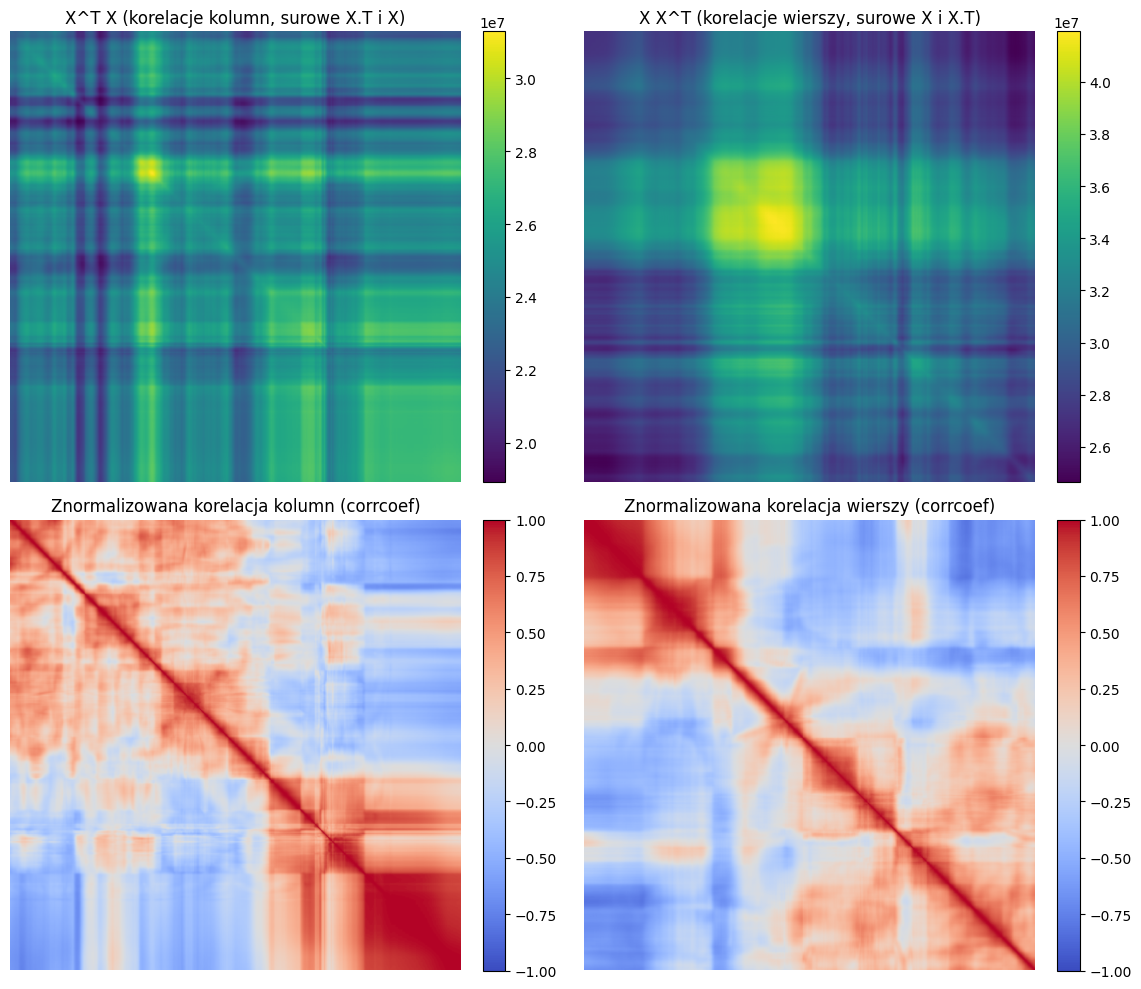

In [8]:
# Wizualizacja macierzy korelacji jako heatmapy
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(12,10))

ax = axes[0,0]
im0 = ax.imshow(XTX, cmap='viridis')
ax.set_title('X^T X (korelacje kolumn, surowe X.T i X)')
ax.axis('off')
plt.colorbar(im0, ax=ax, fraction=0.046, pad=0.04)

ax = axes[0,1]
im1 = ax.imshow(XXT, cmap='viridis')
ax.set_title('X X^T (korelacje wierszy, surowe X i X.T)')
ax.axis('off')
plt.colorbar(im1, ax=ax, fraction=0.046, pad=0.04)

ax = axes[1,0]
im2 = ax.imshow(cols_corr, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Znormalizowana korelacja kolumn (corrcoef)')
ax.axis('off')
plt.colorbar(im2, ax=ax, fraction=0.046, pad=0.04)

ax = axes[1,1]
im3 = ax.imshow(rows_corr, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Znormalizowana korelacja wierszy (corrcoef)')
ax.axis('off')
plt.colorbar(im3, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


## Wnioski

- Macierze korelacji surowe (`X.T @ X`, `X @ X.T`) mają wartości proporcjonalne do energii (sąsiadujących składowych). Ich skala zależy od wartości piksela i wymiarów macierzy.
- Normalizowane macierze korelacji (`np.corrcoef`) mieszczą się w przedziale [-1,1] i pokazują względne podobieństwa między kolumnami (cechami) lub wierszami (próbkami).\n- Wektory własne macierzy korelacji odpowiadają kolumnom `V` i wierszom `U` w SVD, a wartości własne są kwadratami singularnych wartości \n